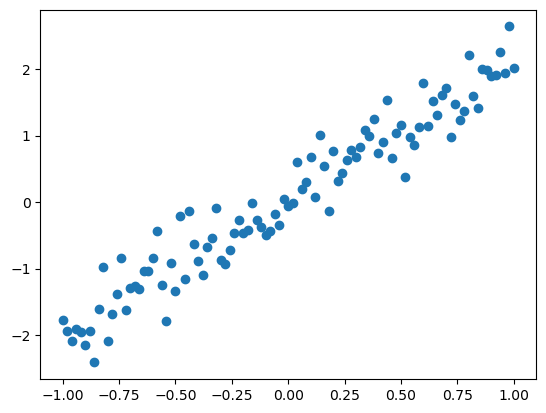

In [1]:
# linear regression


import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1,1,101)
y_train = x_train * 2 + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

In [2]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 100


class LinearModel:
    def __init__(self):
        self.w = tf.Variable(0.0, name='weights')
        
    def __call__(self, x):
        return x * self.w
    
model = LinearModel()

def mean_square_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

optimizer = tf.optimizers.SGD(learning_rate)

2024-05-26 11:07:26.279779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 11:07:26.981291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-26 11:07:27.935531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-26 11:07:27.935564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: davinci-Precision-3541
2024-05-26 11:07:27.935570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: davinci-Precision-3541
2024-05-26 11:07:27.935657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda

In [3]:
def train_step(x , y):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_square_error(y, y_pred)
    gradients = tape.gradient(loss, [model.w])
    optimizer.apply_gradients(zip(gradients, [model.w]))
    return loss

In [4]:
for epoch in range(training_epochs):
    for x,y in zip(x_train, y_train):
        loss = train_step(x,y)
    if epoch % 10 == 0:
        print(f'epoch {epoch} has loss: {loss}')

epoch 0 has loss: 1.0144938230514526
epoch 10 has loss: 0.002496015280485153
epoch 20 has loss: 0.0026024715043604374
epoch 30 has loss: 0.0026026172563433647
epoch 40 has loss: 0.0026026172563433647
epoch 50 has loss: 0.0026026172563433647
epoch 60 has loss: 0.0026026172563433647
epoch 70 has loss: 0.0026026172563433647
epoch 80 has loss: 0.0026026172563433647
epoch 90 has loss: 0.0026026172563433647


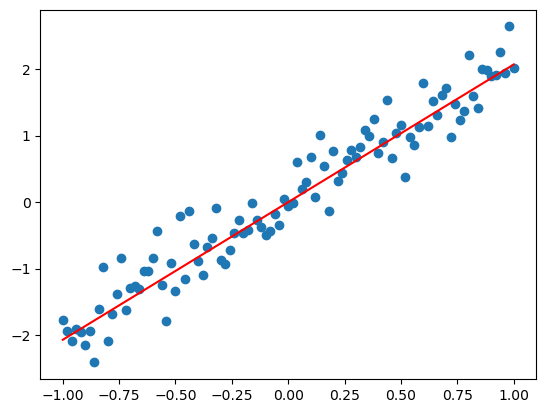

In [5]:
w_val = model.w.numpy()
y_learned = w_val * x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, y_learned, 'r')
plt.show()